In [1]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


2.20.0


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 266s 2us/step
Training shape: (50000, 32, 32, 3)
Testing shape: (10000, 32, 32, 3)


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0


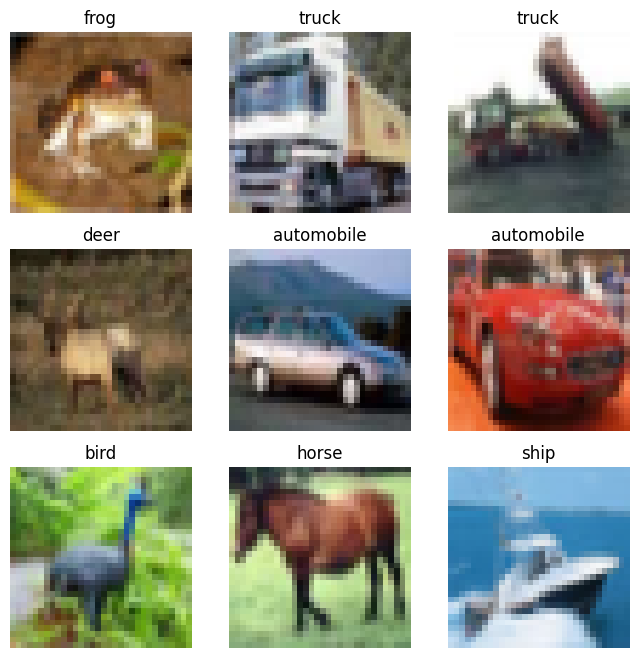

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


In [5]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [6]:
model = models.Sequential([
    
    data_augmentation,
    
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.4001 - loss: 1.6539 - val_accuracy: 0.5213 - val_loss: 1.3477
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5094 - loss: 1.3860 - val_accuracy: 0.5520 - val_loss: 1.2644
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.5470 - loss: 1.2803 - val_accuracy: 0.5749 - val_loss: 1.2227
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5689 - loss: 1.2202 - val_accuracy: 0.6012 - val_loss: 1.1327
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5851 - loss: 1.1794 - val_accuracy: 0.6310 - val_loss: 1.0753
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5982 - loss: 1.1474 - val_accuracy: 0.5996 - val_loss: 1.1557
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.6043 - loss: 1.1230 - val_accuracy: 0.6380 - val_loss: 1.0419
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.6142 - loss: 1.1057 - 

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6353 - loss: 1.0719
Test Accuracy: 0.6352999806404114


In [10]:
predictions = model.predict(x_test)

predicted_class = np.argmax(predictions[0])
print("Predicted:", class_names[predicted_class])
print("Actual:", class_names[y_test[0][0]])


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Predicted: cat
Actual: cat


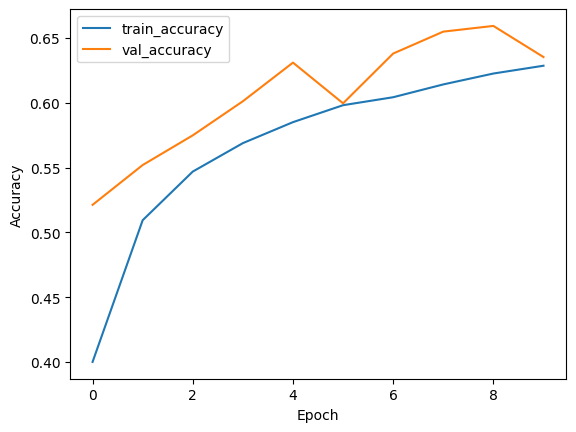

In [11]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
